In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from mplfooty.pitch import Pitch, VerticalPitch

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import os
import matplotlib.font_manager as fm
import matplotlib.ticker as plticker
font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation/mplstyle/lilac_pitch_clusters.mplstyle")

In [151]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation")
from clustering import kmeans, dbscan, GMM, plot_clusters, plot_clusters_grid, plot_start_end_clusters_grid

In [3]:
chains = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/data/playing_style_chains_v2.csv")
chains['Season'] = chains['Round_ID'].apply(lambda x: int(str(x)[:4]))
chains_2023 = chains[chains['Season'] == 2023]
chains_2023.tail()

Chain_Number Initial_State Final_State   Order  Quarter  \
957691           240        ballUp        miss  1849.0        4   
957692           240        ballUp        miss  1850.0        4   
957693           240        ballUp        miss  1851.0        4   
957694           240        ballUp        miss  1852.0        4   
957695           240        ballUp        miss  1853.0        4   

        Quarter_Duration_Chain_Start  Quarter_Duration   Team_Chain  \
957691                          1755            1788.0  Collingwood   
957692                          1755            1792.0  Collingwood   
957693                          1755            1793.0  Collingwood   
957694                          1755            1794.0  Collingwood   
957695                          1755            1805.0  Collingwood   

               Team               Player    AFL_API_Player_ID  \
957691  Collingwood        Brody Mihocek        Brody_Mihocek   
957692  Collingwood            Mason Cox            Mason_Cox   
957693  Collingwood  Will Hoskin-Elliott  Will_Hoskin-Elliott   
957694  Collingwood  Will Hoskin-Elliott  Will_Hoskin-Elliott   
957695  Collingwood  Will Hoskin-Elliott  Will_Hoskin-Elliott   

                 Description     x     y     Disposal Shot_At_Goal  \
957691                  Kick -49.0 -48.0    effective          NaN   
957692                 Spoil  16.0 -63.0          NaN          NaN   
957693  Loose Ball Get Crumb  14.0 -53.0          NaN          NaN   
957694                  Kick  14.0 -52.0  ineffective          NaN   
957695           Ground Kick  26.0 -47.0    effective          NaN   

       Behind_Detail  Venue_Width  Venue_Length    Home_Team       Away_Team  \
957691           NaN          141           160  Collingwood  Brisbane Lions   
957692           NaN          141           160  Collingwood  Brisbane Lions   
957693           NaN          141           160  Collingwood  Brisbane Lions   
957694           NaN          141           160  Collingwood  Brisbane Lions   
957695           NaN          141           160  Collingwood  Brisbane Lions   

       Home_Team_Direction_Q1                          Match_ID Round_ID  \
957691                  right  2023F4_Collingwood_BrisbaneLions   2023F4   
957692                  right  2023F4_Collingwood_BrisbaneLions   2023F4   
957693                  right  2023F4_Collingwood_BrisbaneLions   2023F4   
957694                  right  2023F4_Collingwood_BrisbaneLions   2023F4   
957695                  right  2023F4_Collingwood_BrisbaneLions   2023F4   

        Year  Season  Goal  Behind  Miss  Score           Event_Type1  ballUp  \
957691   NaN    2023   NaN     NaN     0      0      Uncontested Mark    True   
957692   NaN    2023   NaN     NaN     0      0                  Kick    True   
957693   NaN    2023   NaN     NaN     0      0                 Spoil    True   
957694   NaN    2023   NaN     NaN     0      0  Loose Ball Get Crumb    True   
957695   NaN    2023   NaN     NaN     0      0                  Kick    True   

        centreBounce  kickIn  possGain  throwIn           Event_Type0  \
957691         False   False     False    False                  Kick   
957692         False   False     False    False                 Spoil   
957693         False   False     False    False  Loose Ball Get Crumb   
957694         False   False     False    False                  Kick   
957695         False   False     False    False           Ground Kick   

                 Event_Type2       Event_Type3    x0    x1    x2    x3    y0  \
957691                  Kick  Uncontested Mark -49.0 -46.0 -29.0 -27.0 -48.0   
957692      Uncontested Mark              Kick  16.0 -49.0 -46.0 -29.0 -63.0   
957693                  Kick  Uncontested Mark  14.0  16.0 -49.0 -46.0 -53.0   
957694                 Spoil              Kick  14.0  14.0  16.0 -49.0 -52.0   
957695  Loose Ball Get Crumb             Spoil  26.0  14.0  14.0  16.0 -47.0   

          y1    y2   

In [4]:
kicks_inside50 = chains_2023[chains_2023['Kick_Inside50'] == 1]

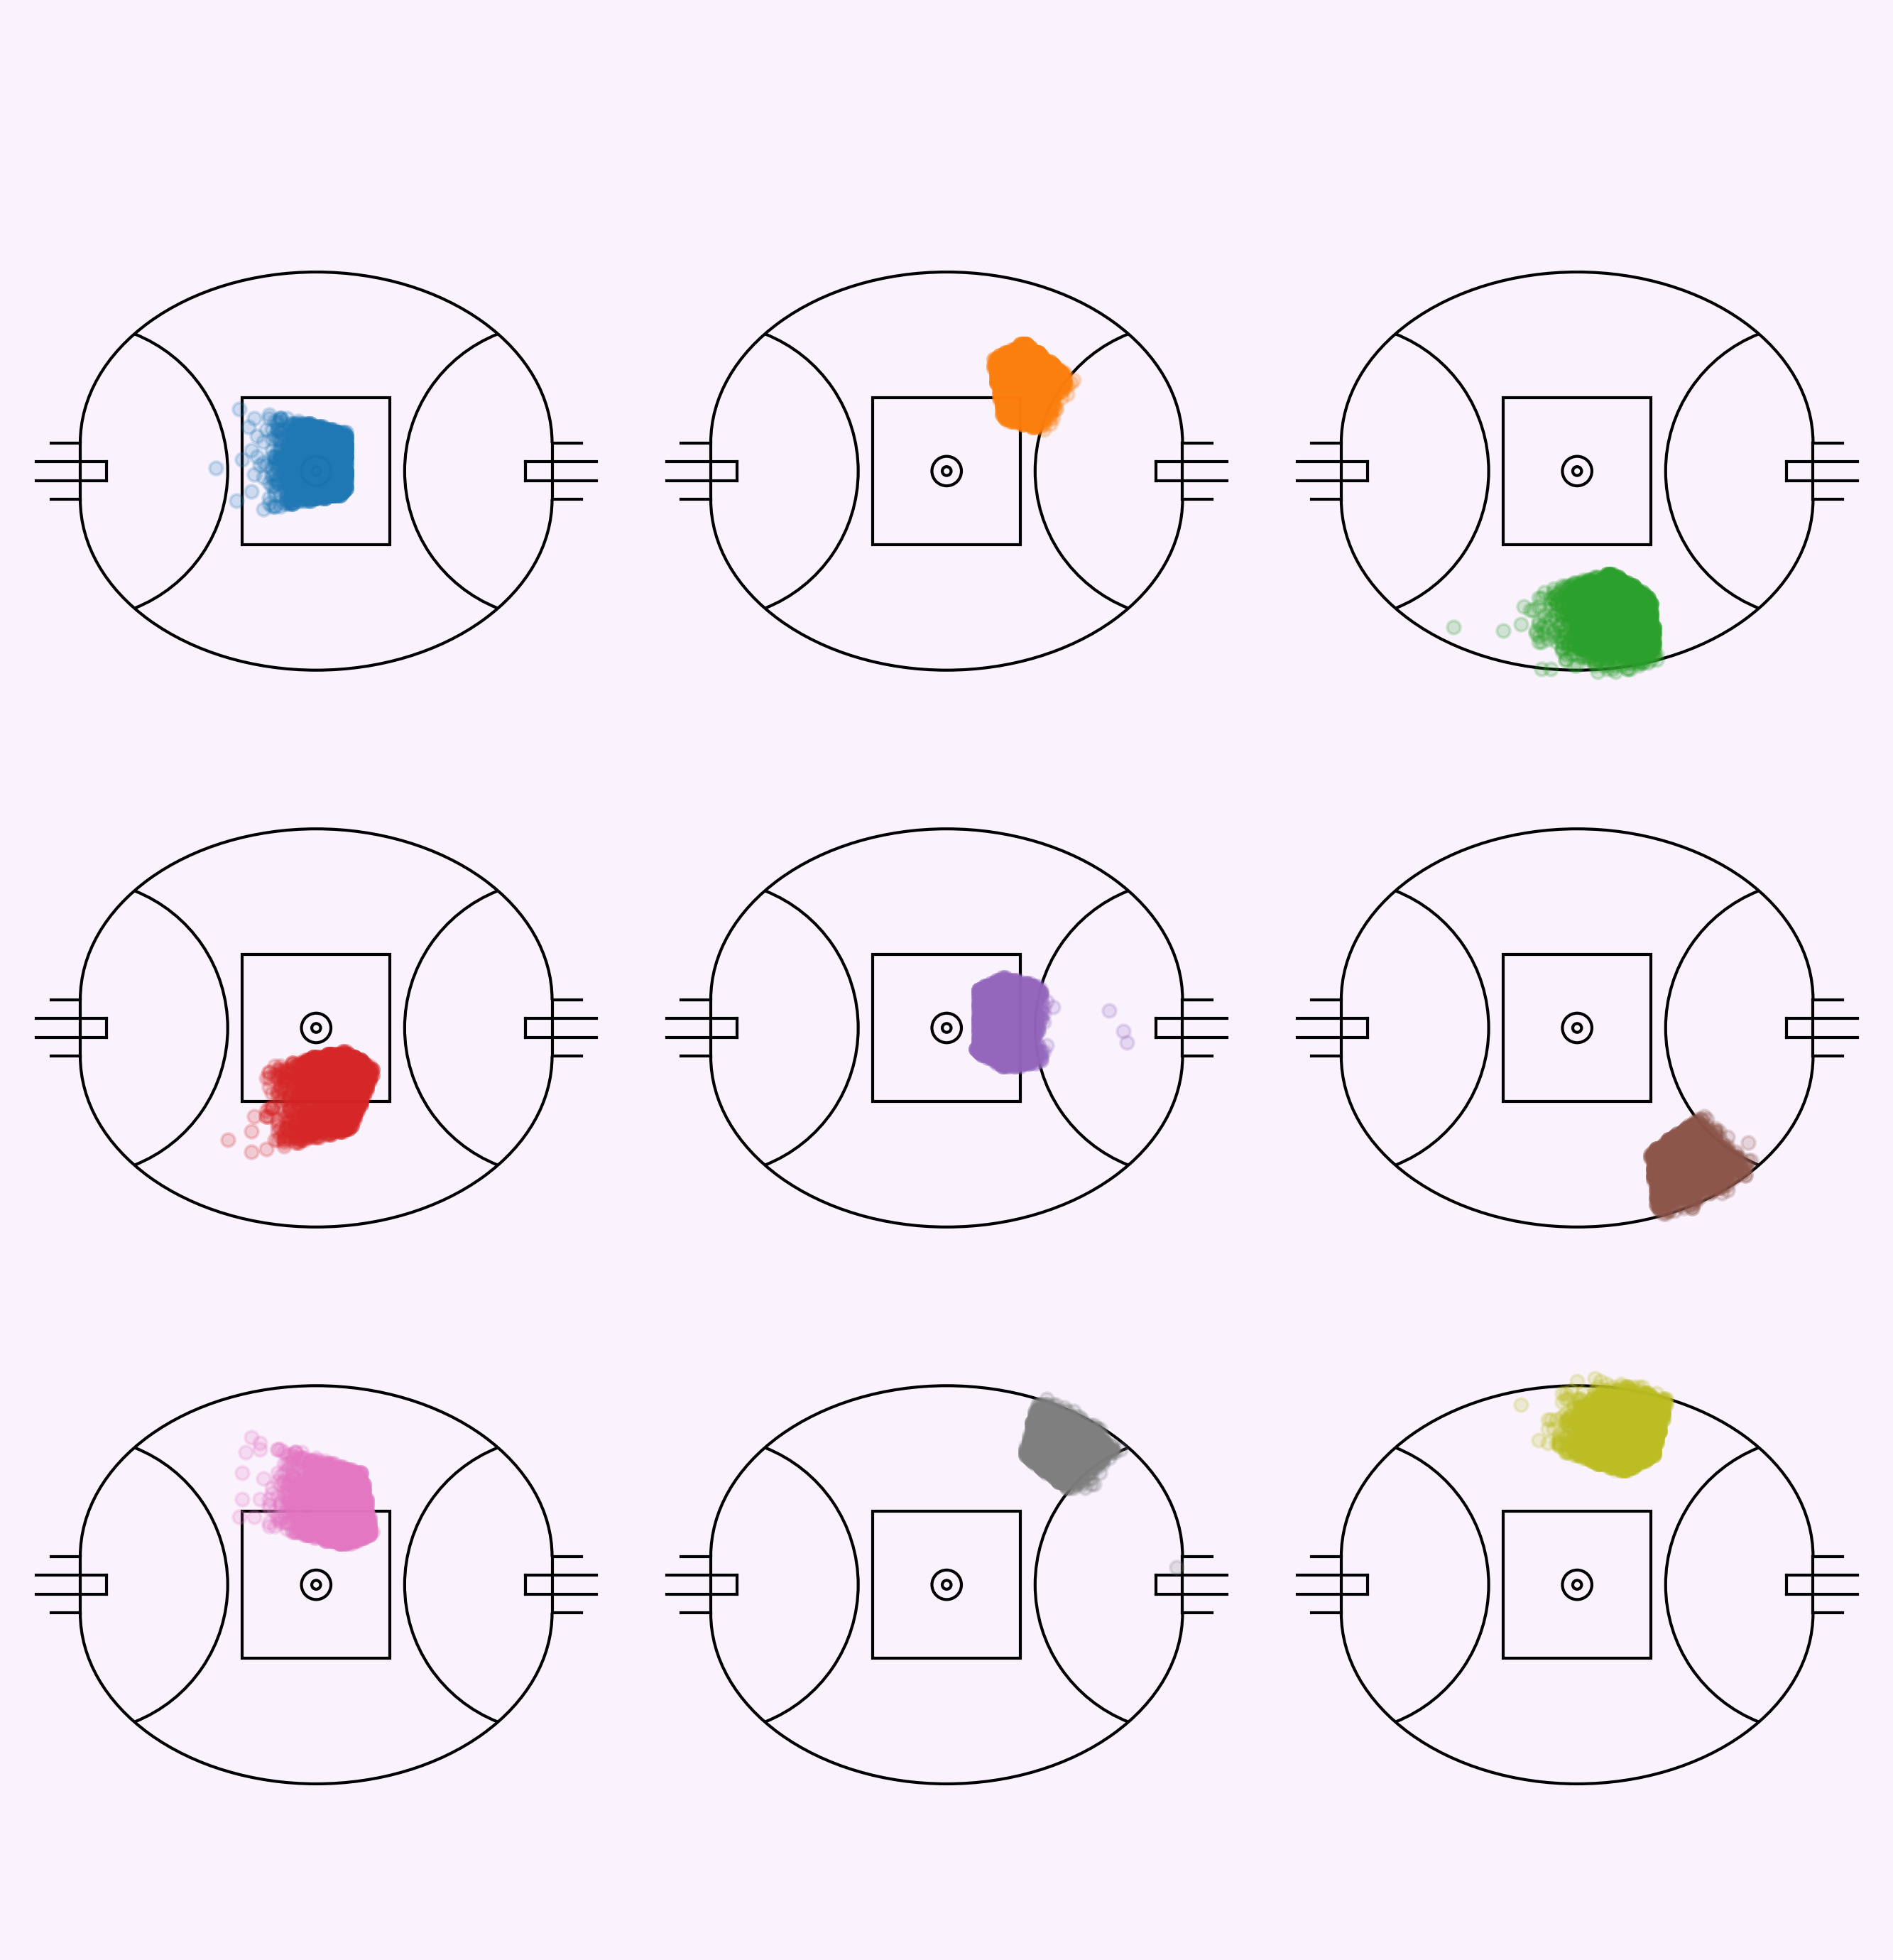

In [49]:
kicks_inside50['kmeans_10'] = kmeans(10, kicks_inside50[['left_right_start_x', 'left_right_start_y']])
plot_clusters_grid(10, kicks_inside50, 'kmeans_10')

By Team

In [41]:
kicks_inside50_pct = kicks_inside50.groupby(['kmeans_10']).size() / kicks_inside50.groupby(['kmeans_10']).size().sum()
kicks_inside50_pct

kmeans_10
0    0.111841
1    0.095156
2    0.106128
3    0.089696
4    0.099100
5    0.110274
6    0.083628
7    0.106431
8    0.100819
9    0.096926
dtype: float64

In [47]:
kicks_inside50_by_team = kicks_inside50.groupby(['Team', 'kmeans_10']).size().reset_index().pivot(index = "kmeans_10", columns='Team', values=0)
kicks_inside50_by_team_pct = kicks_inside50_by_team / kicks_inside50_by_team.sum()
kicks_inside50_by_team_pct['Overall'] = kicks_inside50_pct
kicks_inside50_by_team_normalised = kicks_inside50_by_team_pct.divide(kicks_inside50_pct, axis = 0)
kicks_inside50_by_team_normalised

Team       Adelaide  Brisbane Lions   Carlton  Collingwood  Essendon  \
kmeans_10                                                              
0          0.877866        1.139777  0.984685     0.740648  0.918192   
1          0.907598        0.890314  1.013733     0.888466  1.016327   
2          1.027918        1.066848  0.939228     1.110432  1.014595   
3          1.023664        0.953343  0.994790     1.028243  1.178240   
4          0.944867        0.774987  0.965279     1.016837  1.136852   
5          1.294296        1.091357  1.020550     1.308749  0.867955   
6          1.130544        1.003574  0.874718     0.806709  1.061050   
7          0.905406        1.041490  1.087608     1.075173  0.918027   
8          0.865637        1.083760  1.172072     0.821622  0.870240   
9          1.031716        0.906734  0.920583     1.162994  1.080062   

Team       Fremantle   Geelong  Gold Coast  Greater Western Sydney  Hawthorn  \
kmeans_10                                                                      
0           0.937387  0.839593    1.073619                1.116753  1.233908   
1           0.964034  1.149584    1.054847                1.050056  1.082290   
2           1.044843  0.720604    1.051864                0.812422  0.844248   
3           0.932814  1.014510    0.920353                0.808536  1.079288   
4           1.230835  1.250363    0.861411                1.073318  1.143141   
5           0.822730  0.965649    0.723083                0.986481  0.700436   
6           1.048708  0.775571    1.009560                1.117720  1.182222   
7           1.003979  1.300667    1.101750                1.014526  0.870870   
8           0.999875  0.873772    1.200300                1.055017  1.052144   
9           1.040037  1.108621    1.006552                0.964376  0.871274   

Team       Melbourne  North Melbourne  Port Adelaide  Richmond  St Kilda  \
kmeans_10                                                                  
0           0.893408         1.195961       0.930342  1.032673  0.936085   
1           0.974459         0.859019       1.118515  1.193519  1.024346   
2           1.107210         0.700192       0.957975  0.952234  1.097033   
3           0.882280         1.278208       1.062635  0.836966  0.905590   
4           0.725958         1.060500       1.138122  0.874084  1.092868   
5           1.297545         0.693120       0.878741  0.925160  0.941206   
6           0.822031         1.548659       1.120736  0.978251  0.884955   
7           1.021438         0.847810       1.044799  1.130381  0.949748   
8           1.157585         0.989770       0.685410  1.221945  1.038426   
9           1.047386         0.974764       1.122678  0.834111  1.117382   

Team         Sydney  West Coast  Western Bulldogs  Overall  
kmeans_10                                                   
0          1.288826    1.057893          0.856935      1.0  
1          0.956227    0.992321          0.874169      1.0  
2          0.984702    1.125564          1.397200      1.0  
3          1.195233    0.963948          1.018111      1.0  
4          1.099990    0.860991          0.830257      1.0  
5          0.939510    0.980080          1.377466      1.0  
6          1.077268    0.870639          0.778438      1.0  
7          0.677169    1.100978          0.883504      1.0  
8          0.902517    1.083277          0.941654      1.0  
9          0.901590    0.915516          0.960821      1.0

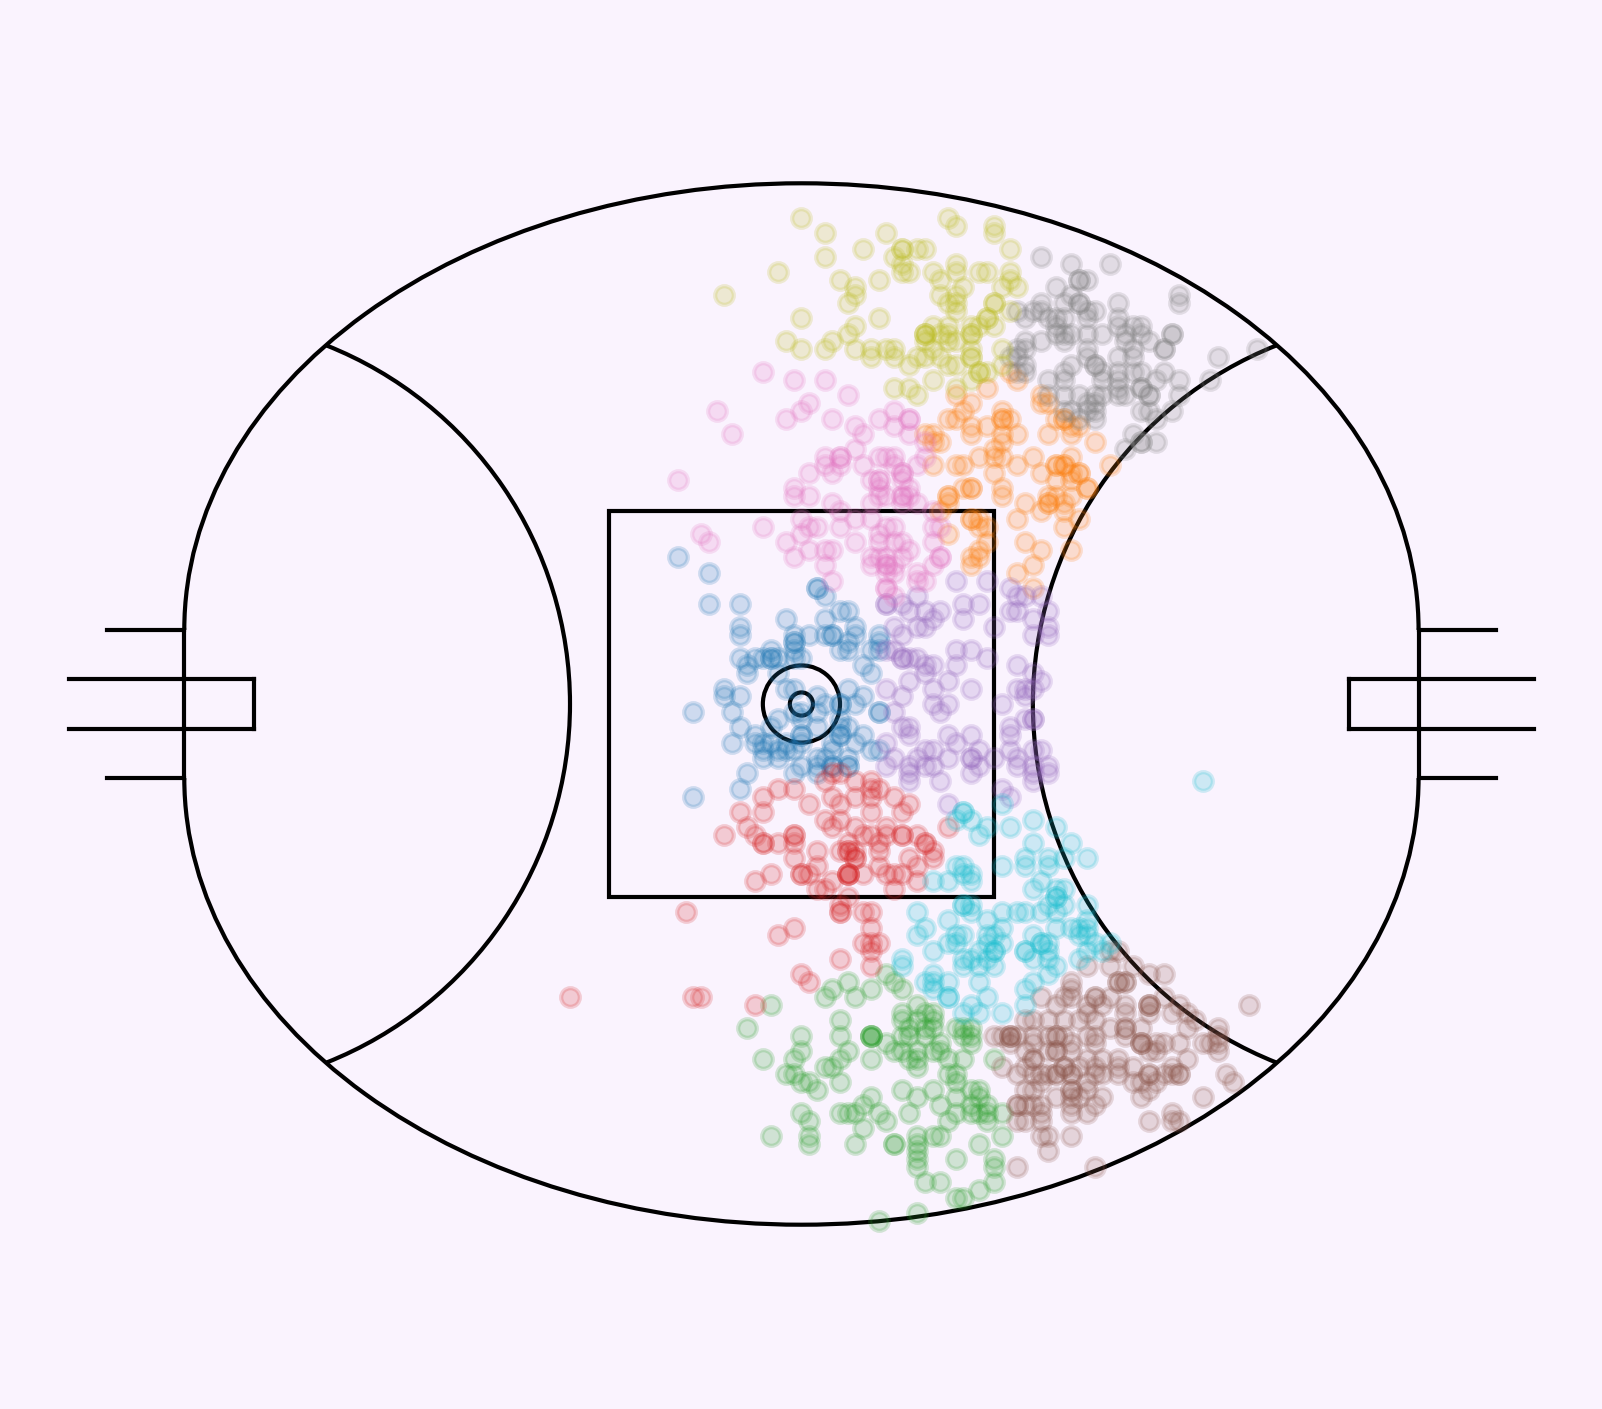

In [48]:
team = "Adelaide"
team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
plot_clusters(10, team_kicks_inside50, 'kmeans_10')

In [93]:
def plot_density_clusters(k, data, label, cluster_alpha, vertical = False, end_location = False):
            
    cluster_alpha_sorted = cluster_alpha.sort_values(ascending=False).reset_index()
    cluster_alpha_sorted['alpha'] = np.linspace(0, 1, len(cluster_alpha_sorted))
    cluster_alpha_sorted = cluster_alpha_sorted.set_index(label).sort_index()
        
    if end_location:
        x, y = 'left_right_end_x', 'left_right_end_y'
    else:
        x, y = 'left_right_start_x', 'left_right_start_y'
        
    if vertical:
        pitch = VerticalPitch(pitch_length=160, pitch_width=135, line_width=1, half = True, pad_bottom=-20, line_colour='k')
    else:
        pitch = Pitch(pitch_length=160, pitch_width=135, line_width=1, line_colour='k')

    fig, ax = pitch.draw()
    for clust in np.linspace(0, k-1, k):        
        clustered = data.loc[data[label] == clust]
                
        pitch.kdeplot(clustered[x], clustered[y], ax=ax, alpha = cluster_alpha_sorted.iloc[int(clust)]['alpha'])

In [150]:
def plot_clusters_alpha(k, data, label, cluster_alpha, vertical = False, end_location = False):
            
    cluster_alpha_sorted = cluster_alpha.sort_values(ascending=False).reset_index()
    cluster_alpha_sorted['alpha'] = np.linspace(0.1, 0.9, len(cluster_alpha_sorted))
    cluster_alpha_sorted = cluster_alpha_sorted.set_index(label).sort_index()
        
    if end_location:
        x, y = 'left_right_end_x', 'left_right_end_y'
    else:
        x, y = 'left_right_start_x', 'left_right_start_y'
        
    if vertical:
        pitch = VerticalPitch(pitch_length=160, pitch_width=135, line_width=1, half = True, pad_bottom=-20, line_colour='k')
    else:
        pitch = Pitch(pitch_length=160, pitch_width=135, line_width=1, line_colour='k')

    fig, ax = pitch.draw()
    for clust in np.linspace(0, k-1, k):        
        clustered = data.loc[data[label] == clust]
                
        pitch.scatter(clustered[x], clustered[y], ax=ax, alpha = cluster_alpha_sorted.iloc[int(clust)]['alpha'])

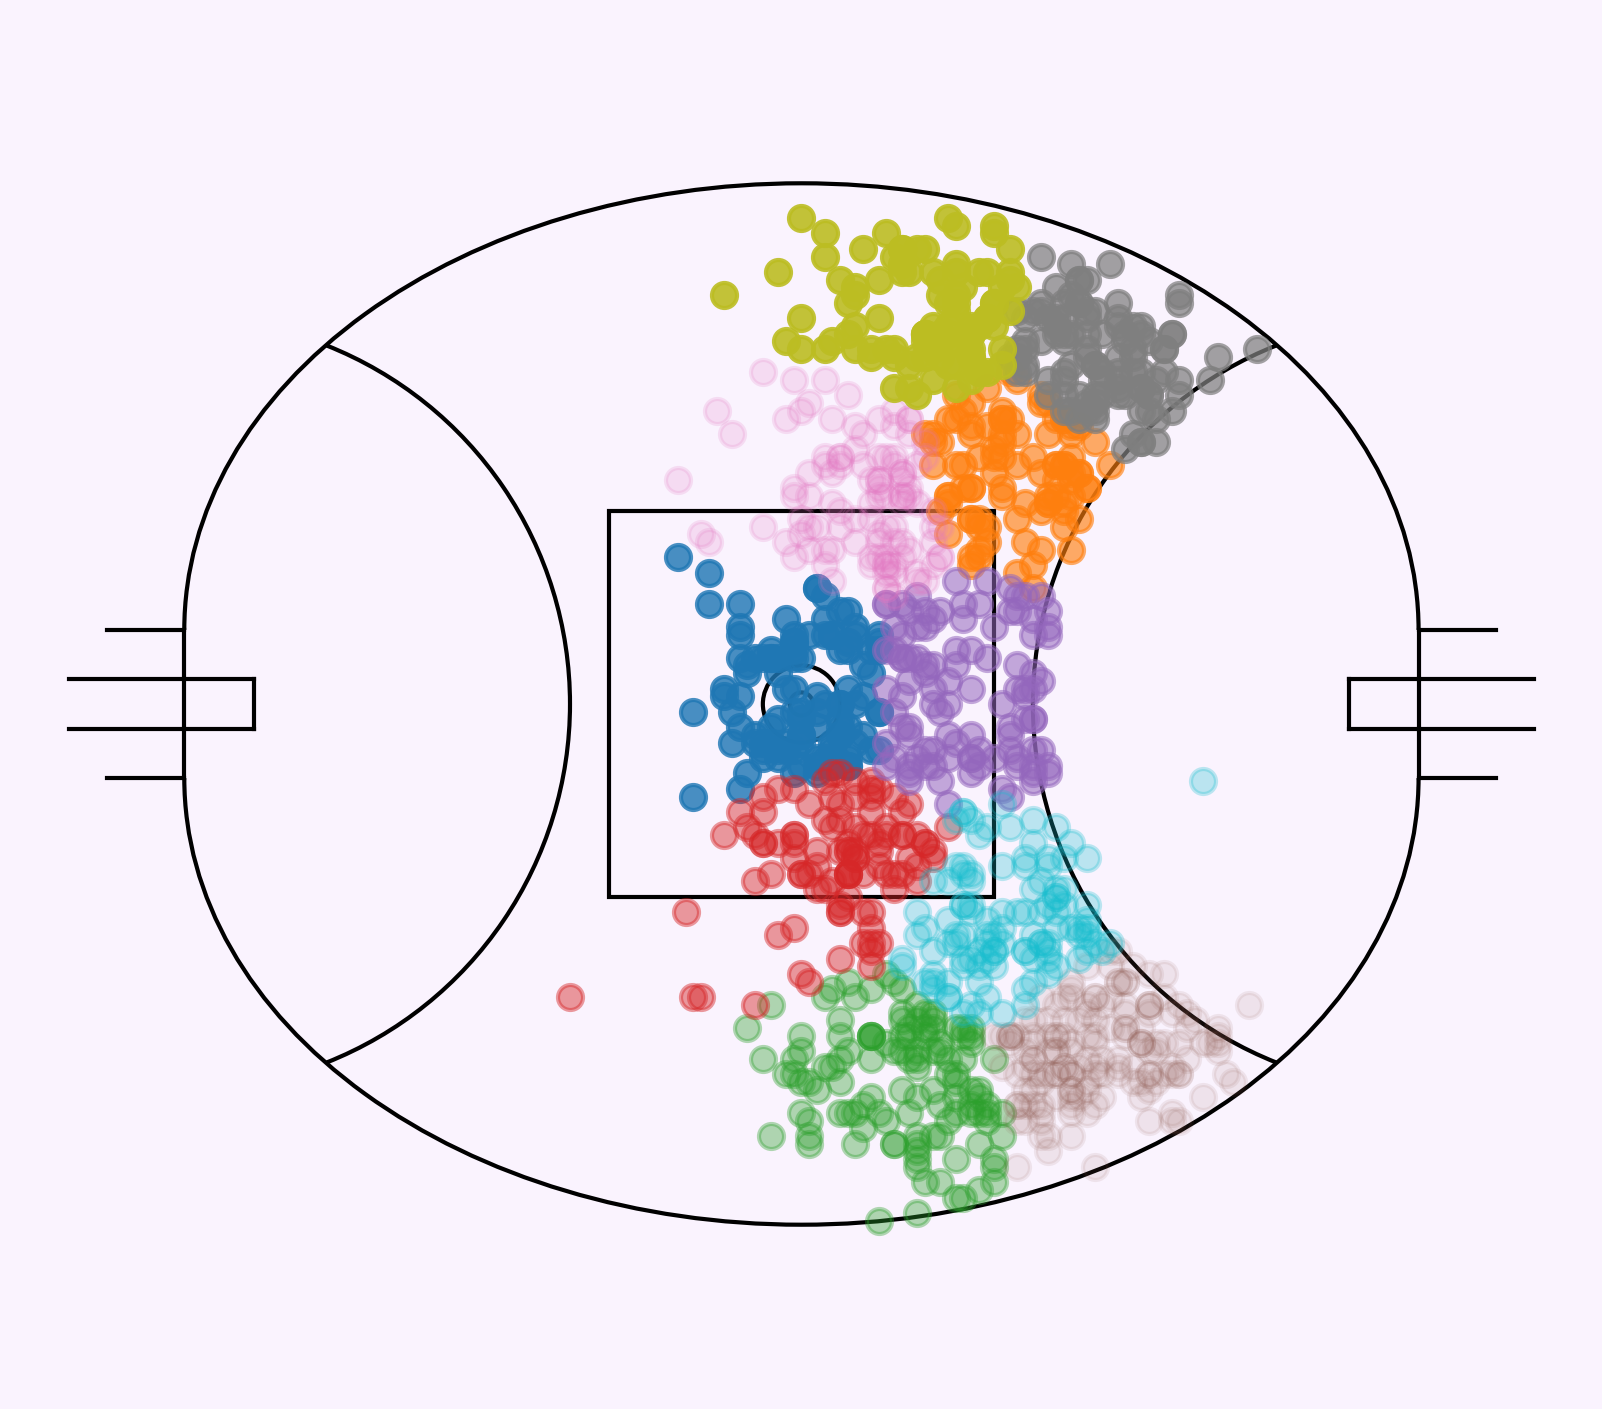

In [100]:
team = "Adelaide"
team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
plot_clusters_alpha(10, team_kicks_inside50, 'kmeans_10', kicks_inside50_by_team_normalised[team])

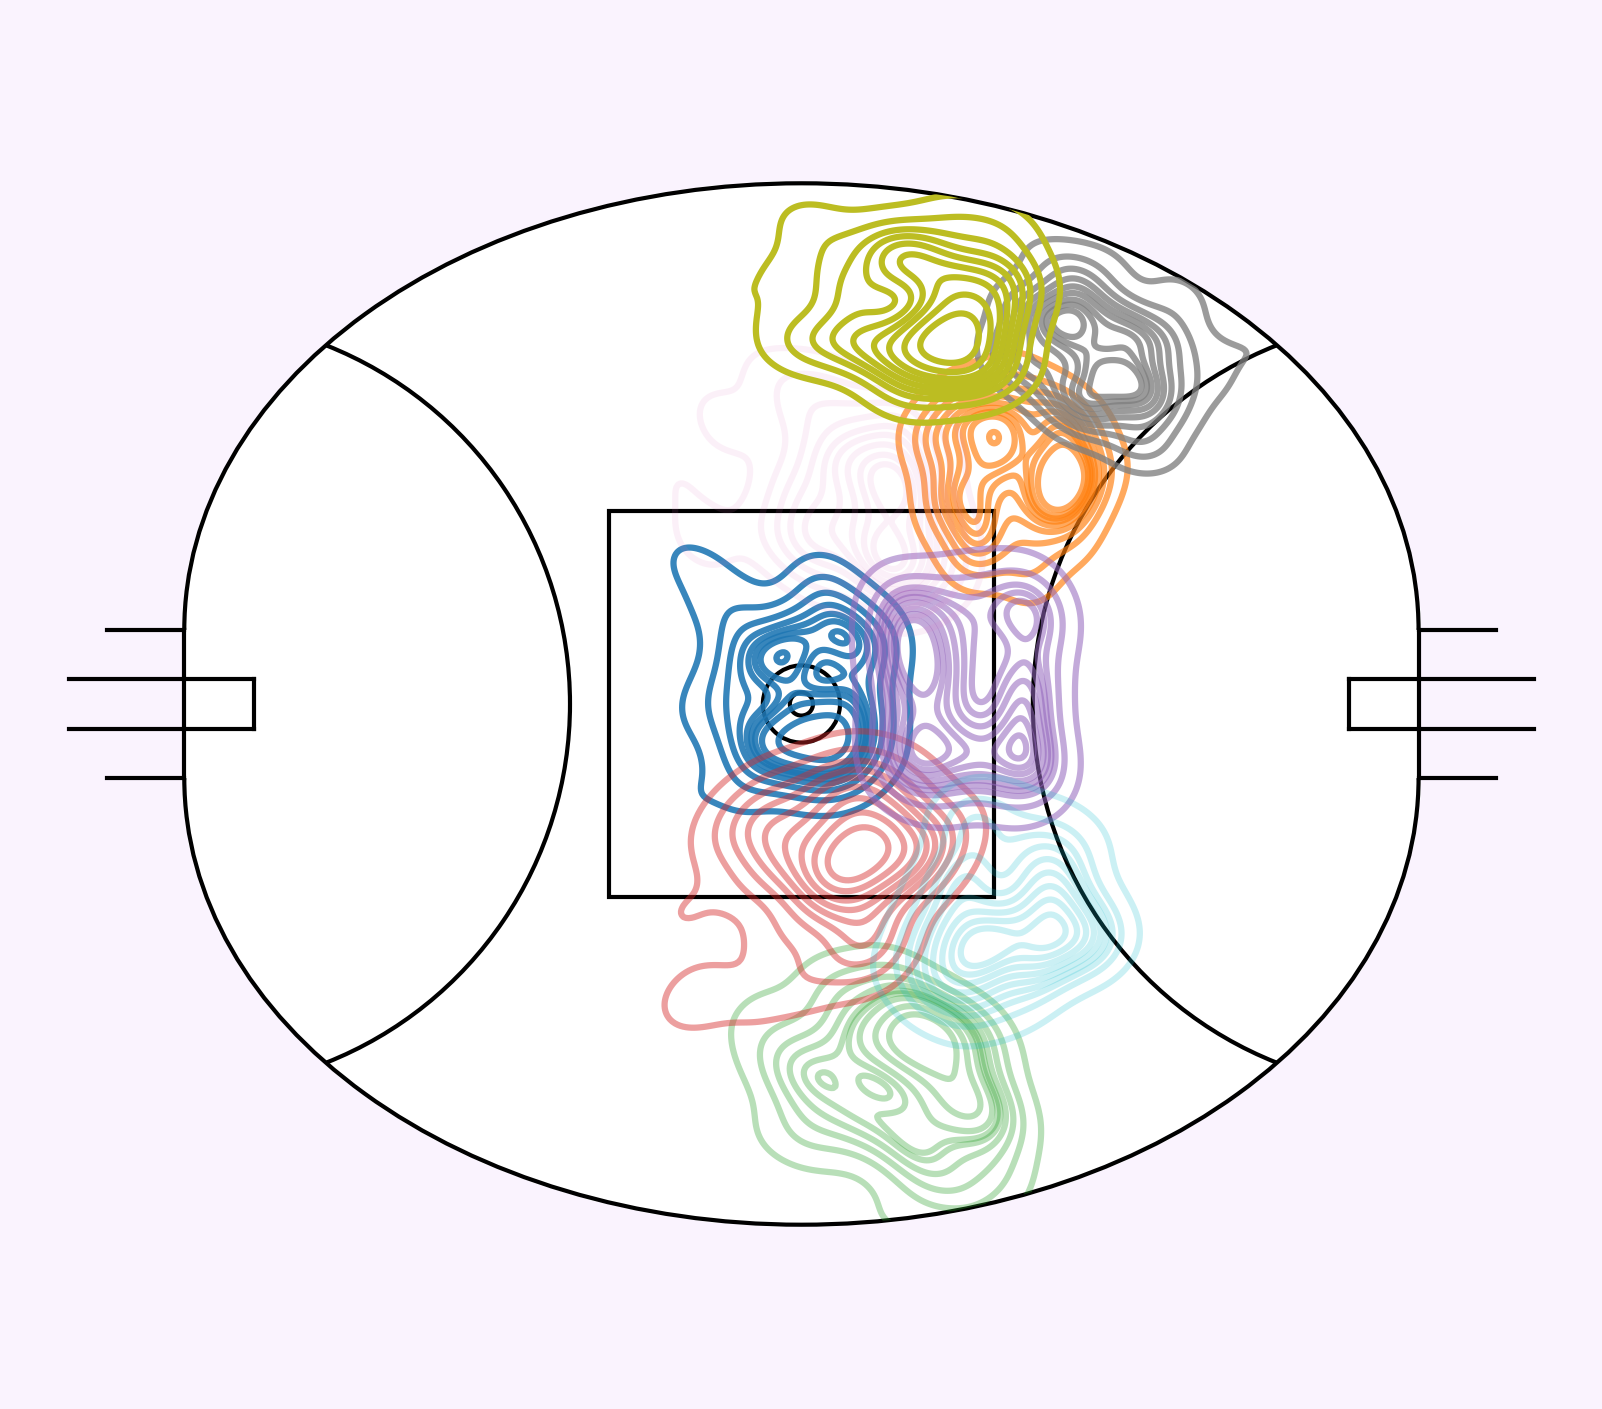

In [95]:
team = "Adelaide"
team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
plot_density_clusters(10, team_kicks_inside50, 'kmeans_10', kicks_inside50_by_team_normalised[team])

Similarity Normalised Inside 50s

In [137]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [141]:
team_cosine_similarity = pd.DataFrame(cosine_similarity(kicks_inside50_by_team_normalised.T))
team_cosine_similarity.columns = list(kicks_inside50_by_team_normalised)
team_cosine_similarity.index = list(kicks_inside50_by_team_normalised)
team_cosine_similarity


Adelaide  Brisbane Lions   Carlton  Collingwood  \
Adelaide                1.000000        0.987988  0.984599     0.990963   
Brisbane Lions          0.987988        1.000000  0.993748     0.977954   
Carlton                 0.984599        0.993748  1.000000     0.981366   
Collingwood             0.990963        0.977954  0.981366     1.000000   
Essendon                0.987094        0.980632  0.986400     0.981074   
Fremantle               0.982592        0.982395  0.989581     0.977885   
Geelong                 0.968671        0.964465  0.982882     0.977664   
Gold Coast              0.971973        0.989970  0.992417     0.964157   
Greater Western Sydney  0.983553        0.988601  0.991942     0.970187   
Hawthorn                0.968428        0.977489  0.981769     0.948518   
Melbourne               0.986552        0.991175  0.989672     0.986918   
North Melbourne         0.960518        0.961234  0.959426     0.930326   
Port Adelaide           0.984207        0.974722  0.979982     0.978925   
Richmond                0.974048        0.990076  0.995077     0.965198   
St Kilda                0.986086        0.987281  0.993338     0.986025   
Sydney                  0.979246        0.980845  0.978199     0.961102   
West Coast              0.983920        0.996915  0.996895     0.981116   
Western Bulldogs        0.985668        0.981481  0.975558     0.988851   
Overall                 0.992135        0.994274  0.996749     0.985718   

                        Essendon  Fremantle   Geelong  Gold Coast  \
Adelaide                0.987094   0.982592  0.968671    0.971973   
Brisbane Lions          0.980632   0.982395  0.964465    0.989970   
Carlton                 0.986400   0.989581  0.982882    0.992417   
Collingwood             0.981074   0.977885  0.977664    0.964157   
Essendon                1.000000   0.995049  0.981156    0.983284   
Fremantle               0.995049   1.000000  0.982503    0.988889   
Geelong                 0.981156   0.982503  1.000000    0.970624   
Gold Coast              0.983284   0.988889  0.970624    1.000000   
Greater Western Sydney  0.985454   0.991399  0.979454    0.988753   
Hawthorn                0.987203   0.987751  0.966283    0.985561   
Melbourne               0.970366   0.972105  0.963431    0.978469   
North Melbourne         0.976223   0.970325  0.942811    0.965316   
Port Adelaide           0.995972   0.991593  0.985084    0.978116   
Richmond                0.976778   0.983741  0.973990    0.994547   
St Kilda                0.992620   0.996181  0.982162    0.990107   
Sydney                  0.988335   0.982288  0.957023    0.974422   
West Coast              0.984780   0.987720  0.974557    0.994147   
Western Bulldogs        0.968299   0.965180  0.947625    0.960501   
Overall                 0.994688   0.995044  0.982528    0.991907   

                        Greater Western Sydney  Hawthorn  Melbourne  \
Adelaide                              0.983553  0.968428   0.986552   
Brisbane Lions                        0.988601  0.977489   0.991175   
Carlton                               0.991942  0.981769   0.989672   
Collingwood                           0.970187  0.948518   0.986918   
Essendon                              0.985454  0.987203   0.970366   
Fremantle                             0.991399  0.987751   0.972105   
Geelong                               0.979454  0.966283   0.963431   
Gold Coast                            0.988753  0.985561   0.978469   
Greater Western Sydney                1.000000  0.989886   0.976754   
Hawthorn                              0.989886  1.000000   0.953246   
Melbourne                             0.976754  0.953246   1.000000   
North Melbourne                       0.973214  0.987775   0.929685   
Port Adelaide                         0.985179  0.982123   0.963788   
Richmond                              0.991648  0.981307   0.983221   
St Kilda                              0.989673  0.980470   0.985387   
Sydney

In [142]:
team_euclidean_distances = pd.DataFrame(euclidean_distances(kicks_inside50_by_team_normalised.T))
team_euclidean_distances.columns = list(kicks_inside50_by_team_normalised)
team_euclidean_distances.index = list(kicks_inside50_by_team_normalised)
team_euclidean_distances

Adelaide  Brisbane Lions   Carlton  Collingwood  \
Adelaide                0.000000        0.493192  0.558234     0.429271   
Brisbane Lions          0.493192        0.000000  0.353888     0.668463   
Carlton                 0.558234        0.353888  0.000000     0.614614   
Collingwood             0.429271        0.668463  0.614614     0.000000   
Essendon                0.513314        0.627154  0.525831     0.621999   
Fremantle               0.594914        0.596247  0.458849     0.671088   
Geelong                 0.802560        0.852498  0.592912     0.678139   
Gold Coast              0.755193        0.450631  0.392011     0.854698   
Greater Western Sydney  0.577755        0.479223  0.402958     0.778474   
Hawthorn                0.806525        0.680270  0.612722     1.030203   
Melbourne               0.522535        0.421861  0.456283     0.515888   
North Melbourne         0.920497        0.912312  0.932837     1.218914   
Port Adelaide           0.569180        0.718234  0.639461     0.657772   
Richmond                0.726210        0.447703  0.315646     0.841644   
St Kilda                0.530839        0.505128  0.365526     0.532624   
Sydney                  0.652469        0.625730  0.667289     0.893600   
West Coast              0.570197        0.248471  0.249218     0.618519   
Western Bulldogs        0.541545        0.614219  0.705223     0.477930   
Overall                 0.399366        0.338584  0.255065     0.538241   

                        Essendon  Fremantle   Geelong  Gold Coast  \
Adelaide                0.513314   0.594914  0.802560    0.755193   
Brisbane Lions          0.627154   0.596247  0.852498    0.450631   
Carlton                 0.525831   0.458849  0.592912    0.392011   
Collingwood             0.621999   0.671088  0.678139    0.854698   
Essendon                0.000000   0.317926  0.623171    0.584072   
Fremantle               0.317926   0.000000  0.599865    0.475182   
Geelong                 0.623171   0.599865  0.000000    0.777059   
Gold Coast              0.584072   0.475182  0.777059    0.000000   
Greater Western Sydney  0.544291   0.417494  0.649582    0.477697   
Hawthorn                0.514322   0.502996  0.836403    0.545952   
Melbourne               0.776774   0.751964  0.866081    0.660994   
North Melbourne         0.717781   0.800304  1.107167    0.863731   
Port Adelaide           0.287905   0.415473  0.555246    0.669805   
Richmond                0.687980   0.574396  0.730935    0.332845   
St Kilda                0.387962   0.278209  0.605191    0.447628   
Sydney                  0.489706   0.602557  0.942528    0.724165   
West Coast              0.556046   0.497925  0.721699    0.344700   
Western Bulldogs        0.806208   0.843444  1.039479    0.898685   
Overall                 0.329849   0.316922  0.598950    0.404918   

                        Greater Western Sydney  Hawthorn  Melbourne  \
Adelaide                              0.577755  0.806525   0.522535   
Brisbane Lions                        0.479223  0.680270   0.421861   
Carlton                               0.402958  0.612722   0.456283   
Collingwood                           0.778474  1.030203   0.515888   
Essendon                              0.544291  0.514322   0.776774   
Fremantle                             0.417494  0.502996   0.751964   
Geelong                               0.649582  0.836403   0.866081   
Gold Coast                            0.477697  0.545952   0.660994   
Greater Western Sydney                0.000000  0.457443   0.685745   
Hawthorn                              0.457443  0.000000   0.980127   
Melbourne                             0.685745  0.980127   0.000000   
North Melbourne                       0.761610  0.517594   1.223154   
Port Adelaide                         0.550989  0.608459   0.860569   
Richmond                              0.411301  0.620728   0.583066   
St Kilda                              0.456310  0.634012   0.542913   
Sydney

In [146]:
# for team in team_euclidean_distances.columns:
#     display(team_euclidean_distances[team].sort_values())

Define Clusters from Teams only

In [172]:
team_kicks_inside50['kmeans_10'].value_counts().index[0]

2

In [183]:
def plot_clusters_start_end(k, data, label = "label", vertical = False):
    
    colour_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    if vertical:
        pitch = VerticalPitch(pitch_length=160, pitch_width=135, line_width=1, half = True, line_colour='k')
    else:
        pitch = Pitch(pitch_length=160, pitch_width=135, line_width=1, line_colour='k')

    fig, ax = pitch.draw()
    
    for rank in np.linspace(0, k-1, k):
        cluster = data[label].value_counts().index[rank]     
        clustered = data.loc[data[label] == cluster]
        pitch.arrows(clustered['left_right_start_x'], clustered['left_right_start_y'], clustered['left_right_end_x'], clustered['left_right_end_y'], color = colour_cycle[int(rank)], ax=ax, width=1)

    return fig, ax

In [244]:
from mplfooty.pitch import Pitch, VerticalPitch
from highlight_text import ax_text, fig_text
from afl_colours import team_colours
import seaborn as sns

In [236]:
team_list = list(chains_2023['Team'].unique())
team_list.sort()
colour_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [300]:
colour_cycle = sns.color_palette("viridis", 3)

In [301]:
# plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation/mplstyle/dark_theme.mplstyle")
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-playing-styles/src/visualisation/mplstyle/lilac_pitch_clusters.mplstyle")


Text(0.35, 0.05, '3rd')

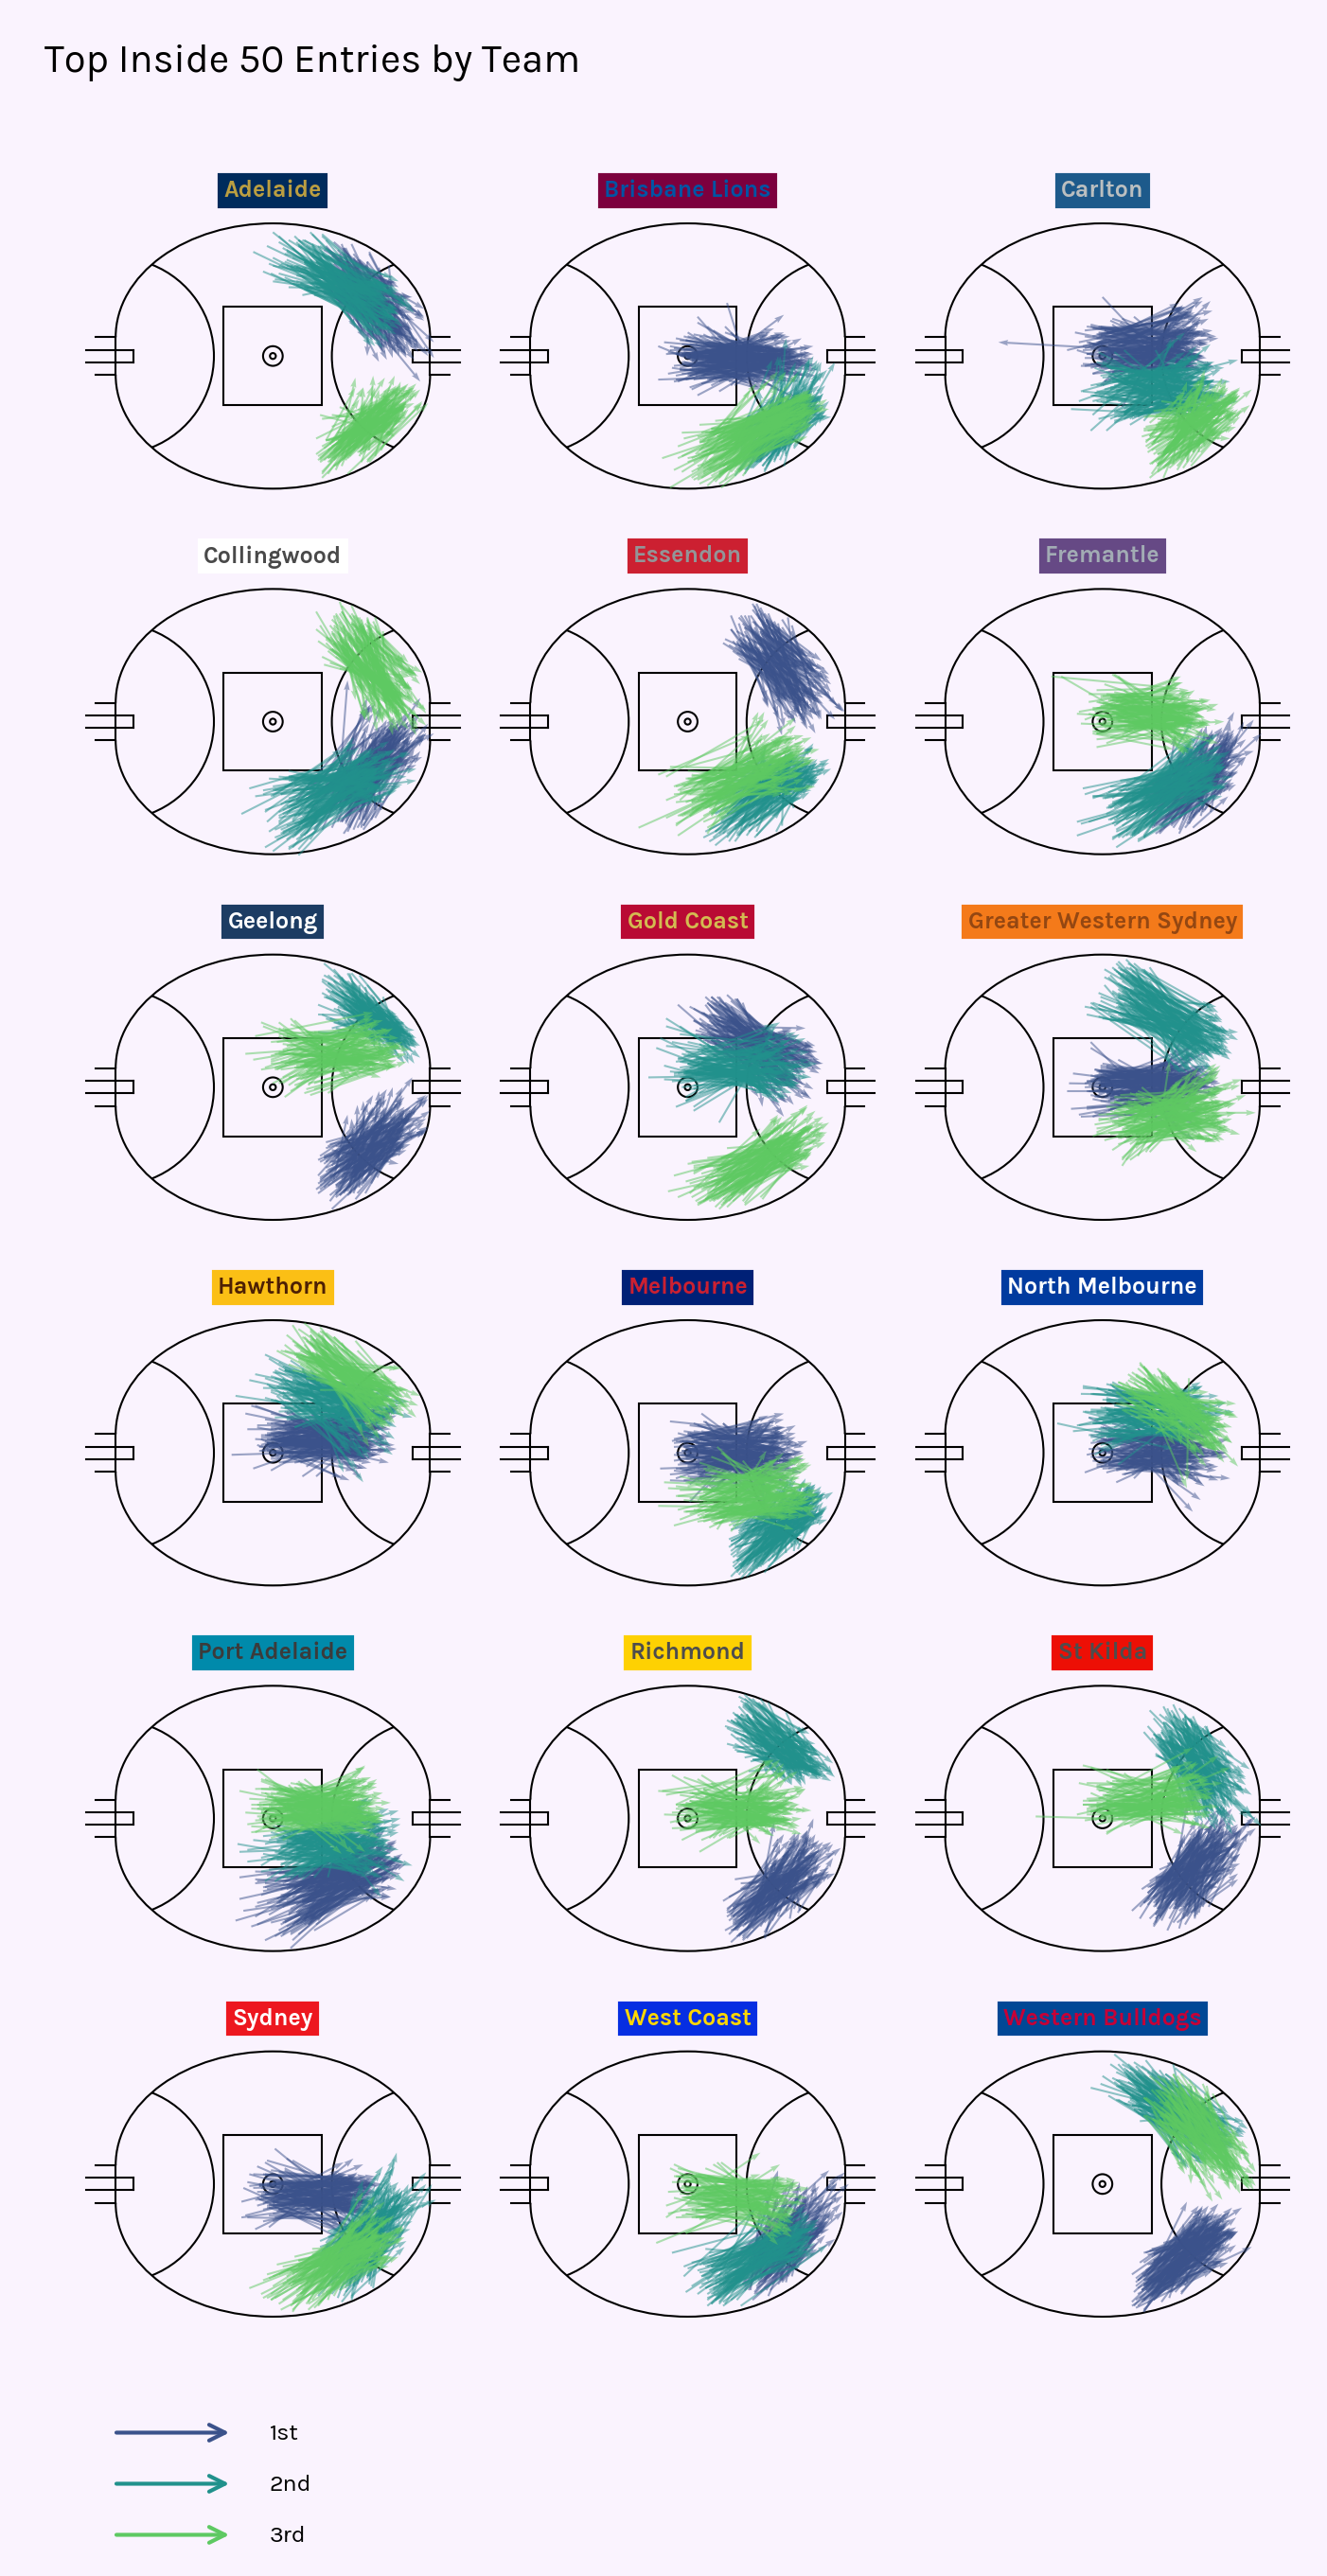

In [302]:
pitch = Pitch(pitch_length=160, pitch_width=135, line_width=0.5, line_colour='k')
fig, axs = pitch.grid(ncols=3, nrows=6, 
                    grid_height=0.85, title_height=0.05, endnote_height=0.05, title_space=0.01, endnote_space=0.01,
                    axis=False)
k=3
for team, ax in zip(team_list, axs['pitch'].flat):
    team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
    team_kicks_inside50['kmeans_10'] = kmeans(10, team_kicks_inside50[['left_right_start_x', 'left_right_start_y', 'left_right_end_x', 'left_right_end_y']])
    for rank in np.linspace(0, k-1, k):
        cluster = team_kicks_inside50['kmeans_10'].value_counts().index[rank]     
        clustered = team_kicks_inside50.loc[team_kicks_inside50['kmeans_10'] == cluster]
        pitch.arrows(clustered['left_right_start_x'], clustered['left_right_start_y'], clustered['left_right_end_x'], clustered['left_right_end_y'], color = colour_cycle[int(rank)], ax=ax, 
                     width=0.5, alpha=0.5)
    ax_text(0, 90, s = '<{}>'.format(team), 
            highlight_textprops = [
                {"color": team_colours[team]['negative'], "bbox": {"edgecolor": team_colours[team]['positive'], "facecolor": team_colours[team]['positive'], "linewidth": 1, "pad": 1},
                 "fontweight":"bold"},
                ],
            ax=ax, ha="center", va="top",
            fontsize = 6, font = "Karla")
fig_text(0, 0.98, s = "Top Inside 50 Entries by Team", font = "Karla")

## Manual Legend
legend_ax = fig.add_axes([0., 0., 0.5, 0.05])
legend_ax.axis("off")

legend_ax.annotate("", xy = (0.3, 0.9), xytext=(0.1, 0.9), 
                   arrowprops={'arrowstyle':"->", "color":colour_cycle[0]})
legend_ax.annotate("", xy = (0.3, 0.5), xytext=(0.1, 0.5), 
                   arrowprops={'arrowstyle':"->", "color":colour_cycle[1]})
legend_ax.annotate("", xy = (0.3, 0.1), xytext=(0.1, 0.1), 
                   arrowprops={'arrowstyle':"->", "color":colour_cycle[2]})
legend_ax.text(0.35, 0.85, "1st", color="k", fontsize=6, font='Karla')
legend_ax.text(0.35, 0.45, "2nd", color="k", fontsize=6, font='Karla')
legend_ax.text(0.35, 0.05, "3rd", color="k", fontsize=6, font='Karla')

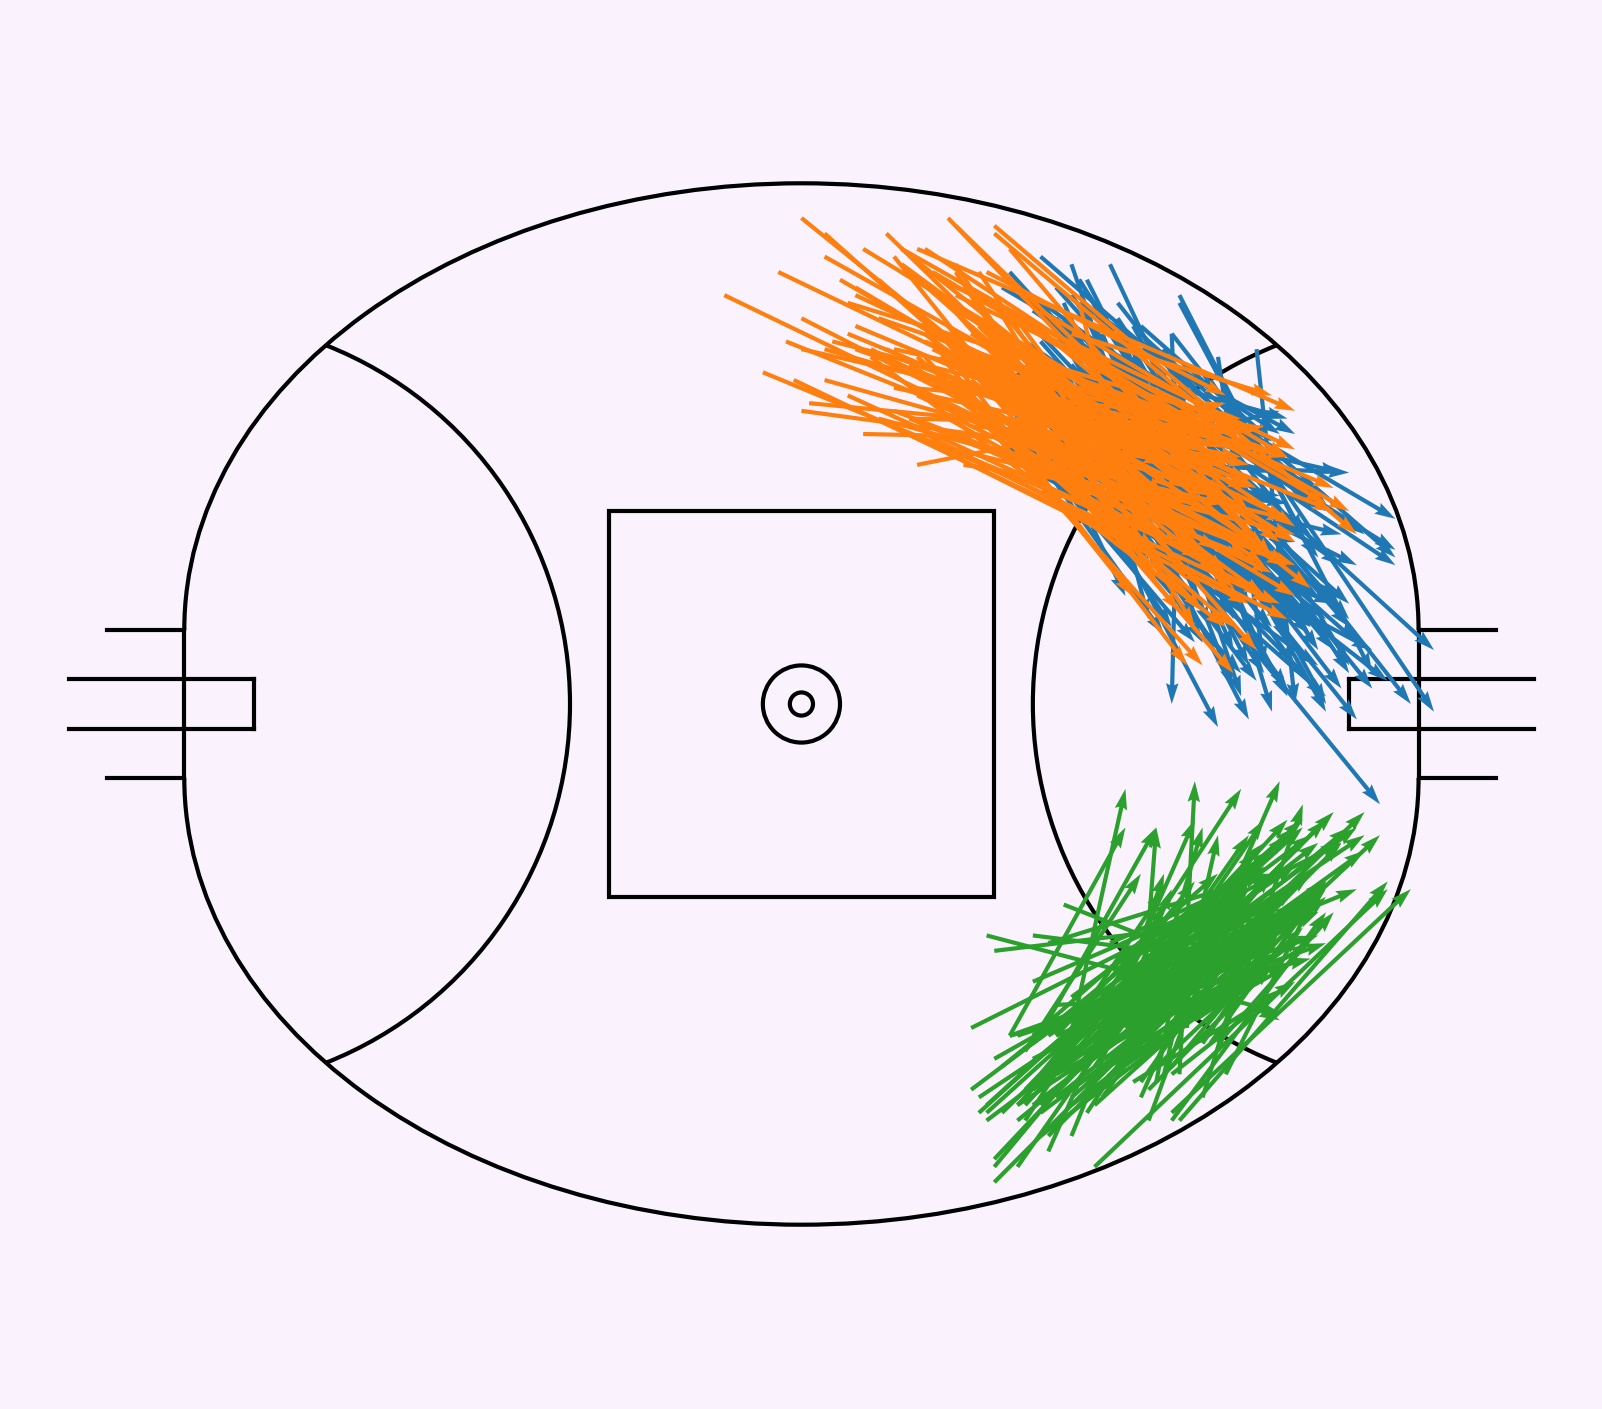

In [220]:
team = "Adelaide"
team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
team_kicks_inside50['kmeans_10'] = kmeans(10, team_kicks_inside50[['left_right_start_x', 'left_right_start_y', 'left_right_end_x', 'left_right_end_y']])
fig, ax = plot_clusters_start_end(3, team_kicks_inside50, 'kmeans_10')

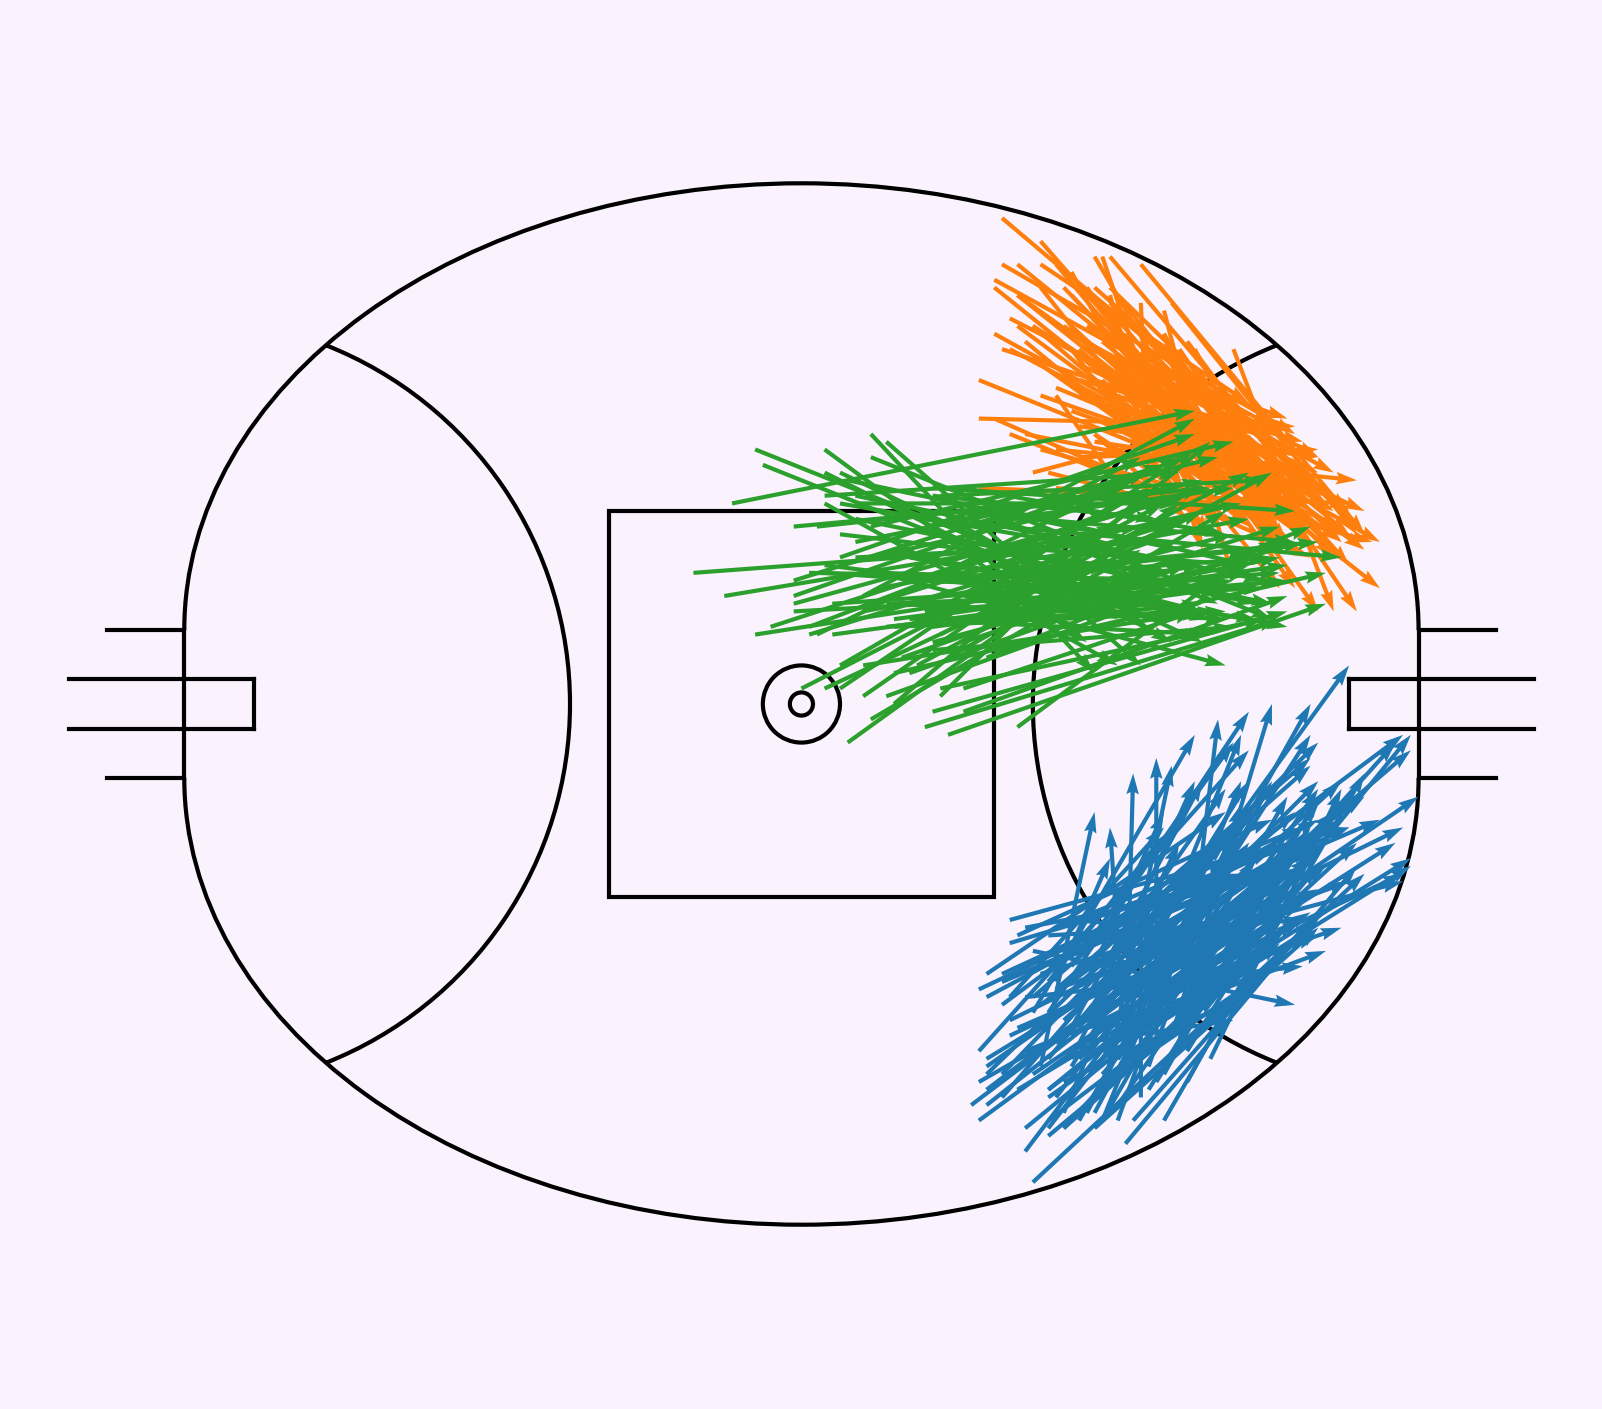

In [189]:
team = "Geelong"
team_kicks_inside50 = kicks_inside50[kicks_inside50['Team'] == team]
team_kicks_inside50['kmeans_10'] = kmeans(10, team_kicks_inside50[['left_right_start_x', 'left_right_start_y', 'left_right_end_x', 'left_right_end_y']])
fig, ax = plot_clusters_start_end(3, team_kicks_inside50, 'kmeans_10')